In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [108]:
df = pd.read_csv('FlightPrice.csv')
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,GO FIRST,G8- 328,13:20,Delhi,02h 00m,0,15:20,Mumbai,5950
1,1,GO FIRST,G8- 530,05:30,Delhi,02h 05m,0,07:35,Mumbai,5950
2,2,GO FIRST,G8- 336,15:15,Delhi,02h 05m,0,17:20,Mumbai,5950
3,3,GO FIRST,G8- 330,20:50,Delhi,02h 15m,0,23:05,Mumbai,5950
4,4,GO FIRST,G8- 354,22:45,Delhi,02h 15m,0,01:00,Mumbai,5950
...,...,...,...,...,...,...,...,...,...,...
14533,14533,Air India,AI-617,11:05,Mumbai,13h 00m,2,00:05,Bangalore,19488
14534,14534,Air India,AI-615,06:00,Mumbai,14h 15m,2,20:15,Bangalore,19488
14535,14535,Air India,AI-633,05:45,Mumbai,14h 30m,2,20:15,Bangalore,24527
14536,14536,Air India,AI-637,18:35,Mumbai,14h 20m,2,08:55,Bangalore,27468


Data has 14538 data and 10 columns

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14538 entries, 0 to 14537
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14538 non-null  int64 
 1   0           14538 non-null  object
 2   1           14538 non-null  object
 3   2           14538 non-null  object
 4   3           14538 non-null  object
 5   4           14538 non-null  object
 6   5           14538 non-null  int64 
 7   6           14538 non-null  object
 8   7           14538 non-null  object
 9   8           14538 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.1+ MB


In [110]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted to Int\n\n',columns)

Below Columns have object datatype which needs to be converted to Int

 ['0', '1', '2', '3', '4', '6', '7']


In [111]:
for i in df.columns:
    a = df[i].isna().sum()
    if a > 0:
        print(i,'column has',a,'NaN values')

Data has no Null values

In [112]:
for i in df.columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'categorical data counts\n')

Unnamed: 0 column has 14538 categorical data counts

0 column has 8 categorical data counts

1 column has 627 categorical data counts

2 column has 224 categorical data counts

3 column has 3 categorical data counts

4 column has 354 categorical data counts

5 column has 3 categorical data counts

6 column has 254 categorical data counts

7 column has 7 categorical data counts

8 column has 2454 categorical data counts



0, 3, 5 and 7 column are categorical columns

In [113]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,GO FIRST,G8- 328,13:20,Delhi,02h 00m,0,15:20,Mumbai,5950
1,1,GO FIRST,G8- 530,05:30,Delhi,02h 05m,0,07:35,Mumbai,5950
2,2,GO FIRST,G8- 336,15:15,Delhi,02h 05m,0,17:20,Mumbai,5950
3,3,GO FIRST,G8- 330,20:50,Delhi,02h 15m,0,23:05,Mumbai,5950
4,4,GO FIRST,G8- 354,22:45,Delhi,02h 15m,0,01:00,Mumbai,5950
...,...,...,...,...,...,...,...,...,...,...
14533,14533,Air India,AI-617,11:05,Mumbai,13h 00m,2,00:05,Bangalore,19488
14534,14534,Air India,AI-615,06:00,Mumbai,14h 15m,2,20:15,Bangalore,19488
14535,14535,Air India,AI-633,05:45,Mumbai,14h 30m,2,20:15,Bangalore,24527
14536,14536,Air India,AI-637,18:35,Mumbai,14h 20m,2,08:55,Bangalore,27468


In [114]:
df[['test0','test1']] = df['2'].str.split(':',expand=True)
df[['test2','test3']] = df['6'].str.split(':',expand=True)

In [115]:
df['Departure_time'] = df['test0'] + '.' + df['test1']
df['Arrival_time'] = df['test2'] + '.' + df['test3']

In [116]:
df = df.drop(['2','6','test0','test1','test2','test3'],axis=1)

In [117]:
df.columns = ['Unnamed: 0','Airline','Flight_name','Source', 'Duration', 'Stops','Destination','Price','Departure_time', 'Arrival_time']

In [118]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Flight_name', 'Source', 'Duration', 'Stops',
       'Destination', 'Price', 'Departure_time', 'Arrival_time'],
      dtype='object')

In [119]:
df = df.drop(['Unnamed: 0'],axis=1)

'Unnamed: 0' has no imp values hence have dropped the column

In [120]:
df[['test0','test1']] = df['Duration'].str.split('h',expand=True)
df[['test2','test3']] = df['test1'].str.split('m',expand=True)
df['Duration'] = df['test0'] + '.' + df['test2']
df[['test2','test3']] = df['Duration'].str.split(' ',expand=True)
df['Duration'] = df['test2'] + df['test3']

In [121]:
df = df.drop(['test0','test1','test2','test3'],axis=1)
df

,Airline,Flight_name,Source,Duration,Stops,Destination,Price,Departure_time,Arrival_time
0,GO FIRST,G8- 328,Delhi,02.00,0,Mumbai,5950,13.20,15.20
1,GO FIRST,G8- 530,Delhi,02.05,0,Mumbai,5950,05.30,07.35
2,GO FIRST,G8- 336,Delhi,02.05,0,Mumbai,5950,15.15,17.20
3,GO FIRST,G8- 330,Delhi,02.15,0,Mumbai,5950,20.50,23.05
4,GO FIRST,G8- 354,Delhi,02.15,0,Mumbai,5950,22.45,01.00
...,...,...,...,...,...,...,...,...,...
14533,Air India,AI-617,Mumbai,13.00,2,Bangalore,19488,11.05,00.05
14534,Air India,AI-615,Mumbai,14.15,2,Bangalore,19488,06.00,20.15
14535,Air India,AI-633,Mumbai,14.30,2,Bangalore,24527,05.45,20.15
14536,Air India,AI-637,Mumbai,14.20,2,Bangalore,27468,18.35,08.55


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14538 entries, 0 to 14537
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         14538 non-null  object
 1   Flight_name     14538 non-null  object
 2   Source          14538 non-null  object
 3   Duration        14538 non-null  object
 4   Stops           14538 non-null  int64 
 5   Destination     14538 non-null  object
 6   Price           14538 non-null  int64 
 7   Departure_time  14538 non-null  object
 8   Arrival_time    14538 non-null  object
dtypes: int64(2), object(7)
memory usage: 1022.3+ KB


In [123]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted to Int\n\n',columns)

Below Columns have object datatype which needs to be converted to Int

 ['Airline', 'Flight_name', 'Source', 'Duration', 'Destination', 'Departure_time', 'Arrival_time']


In [124]:
df = df.astype({'Duration': float})
df = df.astype({'Departure_time': float})
df = df.astype({'Arrival_time': float})

Changing data type from string to float as it contains number data

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14538 entries, 0 to 14537
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         14538 non-null  object 
 1   Flight_name     14538 non-null  object 
 2   Source          14538 non-null  object 
 3   Duration        14538 non-null  float64
 4   Stops           14538 non-null  int64  
 5   Destination     14538 non-null  object 
 6   Price           14538 non-null  int64  
 7   Departure_time  14538 non-null  float64
 8   Arrival_time    14538 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1022.3+ KB


In [126]:
df['Route'] = df['Source'] + '-' + df['Destination']

In [128]:
df1 = df[['Airline','Departure_time','Arrival_time','Route','Price']]

In [129]:
Airline = df1.groupby('Airline')
Airline.mean().sort_values(by='Price',ascending=False)

,Departure_time,Arrival_time,Price
Airline,,,
Vistara,14.021234,15.195823,12667.950024
Air India,13.183225,13.802524,12506.707999
AirAsia,13.297744,13.140188,10886.362406
GO FIRST,13.497614,13.732450,9857.241782
SpiceJet,12.999742,14.680219,9755.628866
Indigo,12.425234,13.996671,8902.790304
AkasaAir,15.080000,12.281000,4269.460000
AllianceAir,19.150000,20.370000,3828.200000


- As per above table we can see that Vistara has the highest average price of flight ticket following with Air India and AirAsia
- AllianceAir has the lowest flight average ticket price following with AkasaAir and Indigo

In [179]:
Route = df1.groupby('Route')
Route.mean().sort_values(by='Price',ascending=False)

,Departure_time,Arrival_time,Price
Route,,,
Delhi-Kolkata,13.006913,15.193054,13464.595302
Kolkata-Delhi,14.065397,15.160731,13127.418351
Delhi-Patna,12.699902,13.989335,13034.945205
Mumbai-Goa,14.484872,12.132036,12229.737486
Delhi-Pune,13.617789,11.255829,11423.670121
Mumbai-Delhi,12.705949,14.215954,11037.302360
Delhi-Goa,13.114519,13.431084,10820.671438
Delhi-Bangalore,12.994044,14.689877,10182.826471
Delhi-Mumbai,12.959354,15.614820,10020.826531


Delhi to Kolkata has the highest flight price whereas Mumbai to Bangalore has lowest

In [131]:
Departure_time = df1.groupby('Departure_time')
Departure_time.mean().sort_values(by='Price',ascending=False)

,Arrival_time,Price
Departure_time,,
12.20,14.63750,17227.000000
13.15,15.70000,16736.215686
12.10,17.69881,16194.880952
10.55,18.10000,16088.300000
14.05,21.75000,15753.555556
...,...,...
7.35,9.20000,4497.000000
16.30,18.00000,4322.800000
19.05,20.37500,3733.625000


23.25 is the best time to depart towards the destination as it has the lowest price of flight ticket

In [132]:
Arrival_time = df1.groupby('Arrival_time')
Arrival_time.mean().sort_values(by='Price',ascending=False)

,Departure_time,Price
Arrival_time,,
14.40,7.668750,23576.250000
13.45,14.126531,18187.698980
0.50,15.123810,16272.714286
17.00,11.004348,15598.521739
5.55,13.454101,15204.886435
...,...,...
4.15,2.000000,5954.000000
4.10,2.100000,5954.000000
9.10,7.000000,5951.000000


11.45 is the best time to arrived on destination as it has the lowest price of flight ticket

In [133]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [134]:
df.describe()

,Airline,Flight_name,Source,Duration,Stops,Destination,Price,Departure_time,Arrival_time,Route
count,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000
mean,3.852112,368.701954,0.711377,10.275052,0.885816,2.081235,11202.612464,13.275162,14.226207,4.243981
std,2.842741,177.608480,0.910108,7.415278,0.511709,1.865924,4444.533262,5.592099,6.577252,2.975116
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2454.000000,0.100000,0.050000,0.000000
25%,0.000000,255.000000,0.000000,5.100000,1.000000,0.250000,7754.000000,8.300000,9.200000,2.000000
50%,5.000000,360.000000,0.000000,8.250000,1.000000,2.000000,10680.000000,13.150000,14.450000,4.000000
75%,7.000000,542.000000,2.000000,14.550000,1.000000,4.000000,13620.000000,18.300000,20.000000,7.000000
max,7.000000,626.000000,2.000000,48.500000,2.000000,6.000000,51834.000000,23.550000,23.550000,9.000000


In [135]:
x = df.drop(['Price'],axis=1)
y = df['Price']

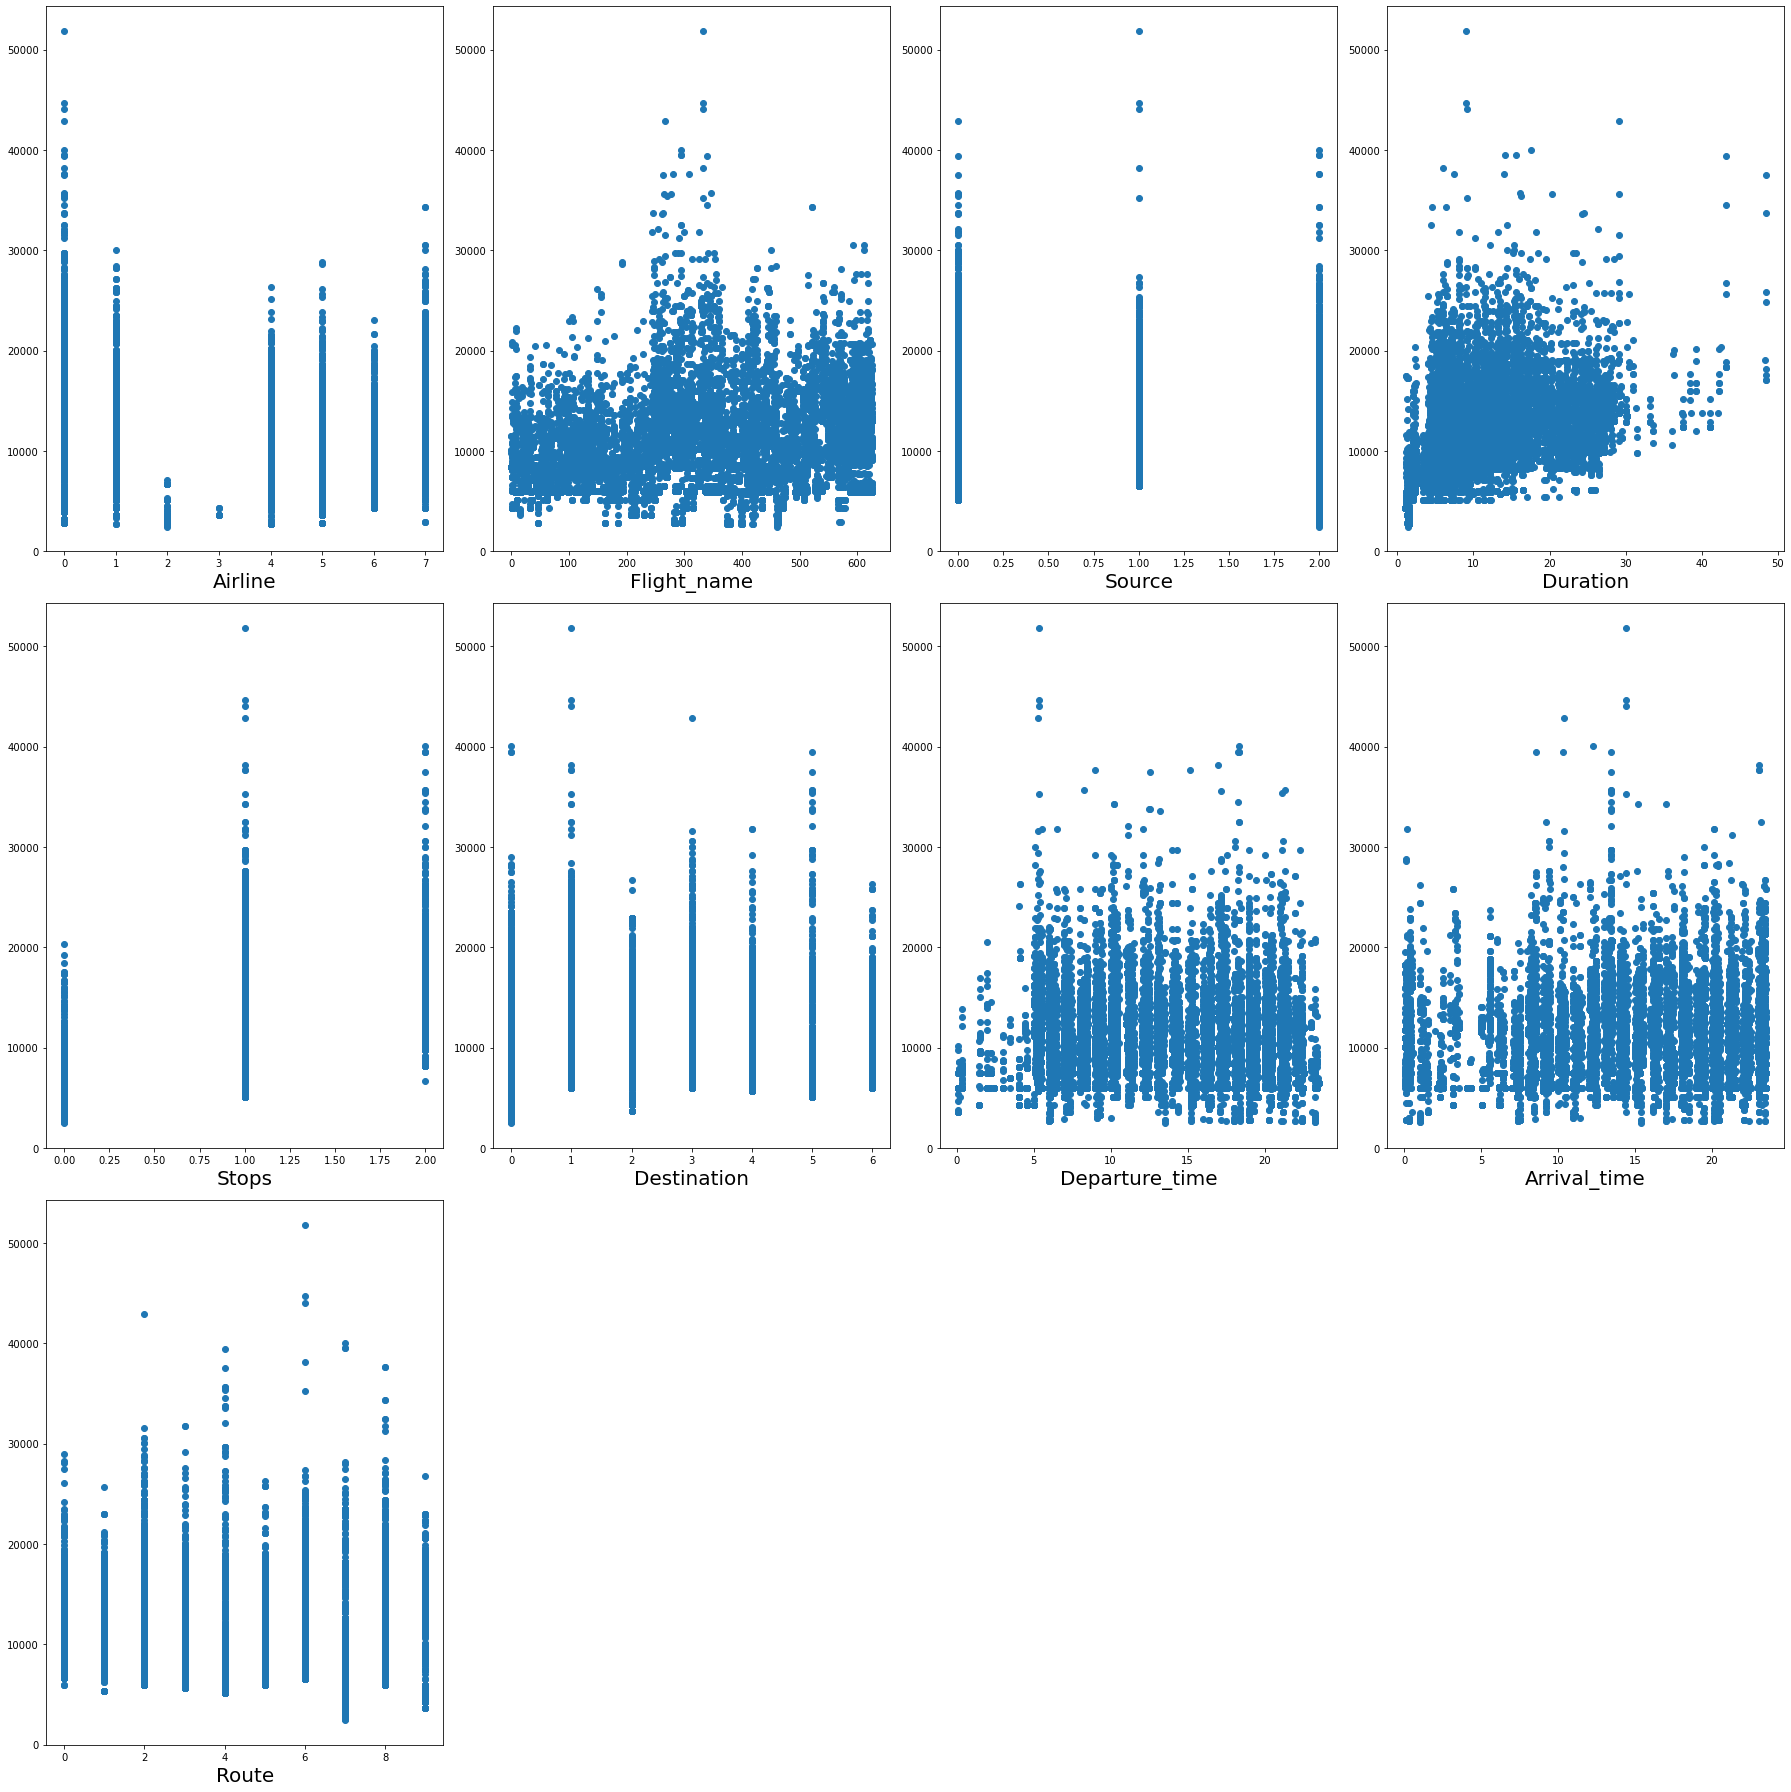

In [136]:
plt.figure(figsize=(25,25), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

- Duration and Stops column has high co-relation with Label.
- Airline, Arrival_time and Departure_time columns has Low/No co-relation with Label.

In [137]:
for i in df.columns:
    a = df[i].corr(df['Price'])
    print(i,'=',a)

Airline = -0.05463065648461538
Flight_name = 0.22885893785096834
Source = -0.02474481592048357
Duration = 0.4593206096072397
Stops = 0.5668478276504108
Destination = 0.07851292597305205
Price = 0.9999999999999998
Departure_time = -0.01336409026794728
Arrival_time = 0.04327081185691782
Route = 0.03389489966425172


- Duration and Stops column has high co-relation with Label.
- Airline, Arrival_time and Departure_time columns has Low/No co-relation with Label.

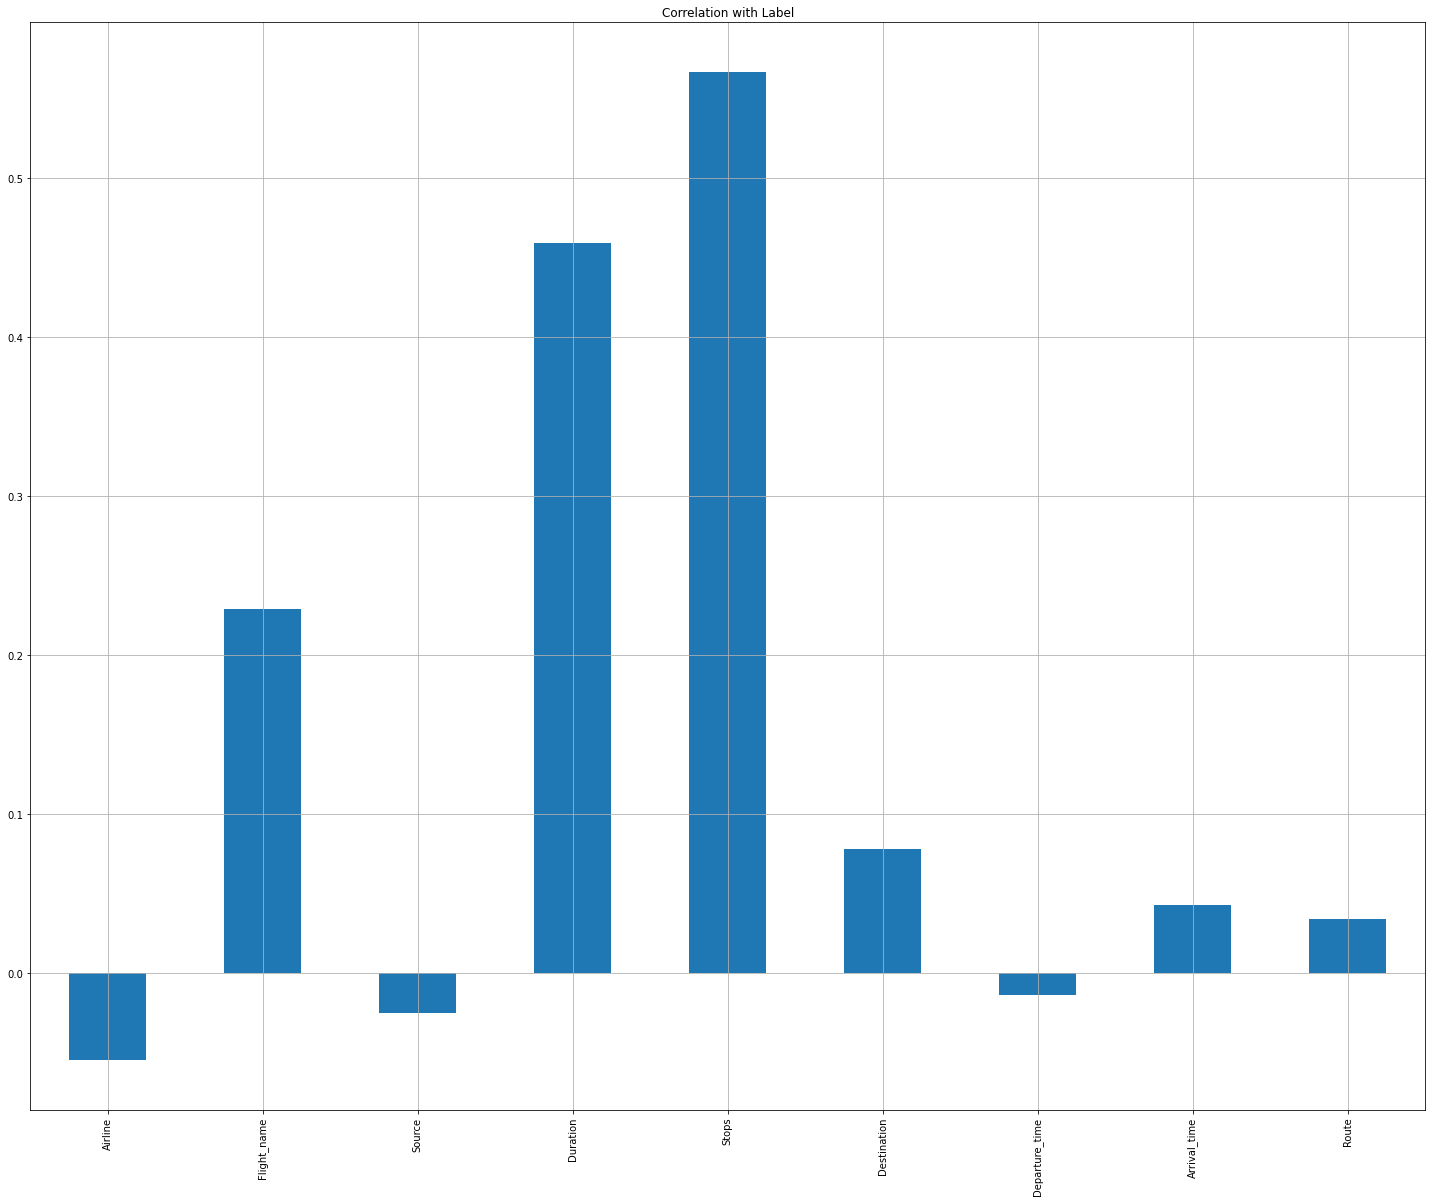

In [138]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(25,20),
                                                     title="Correlation with Label")
plt.show()

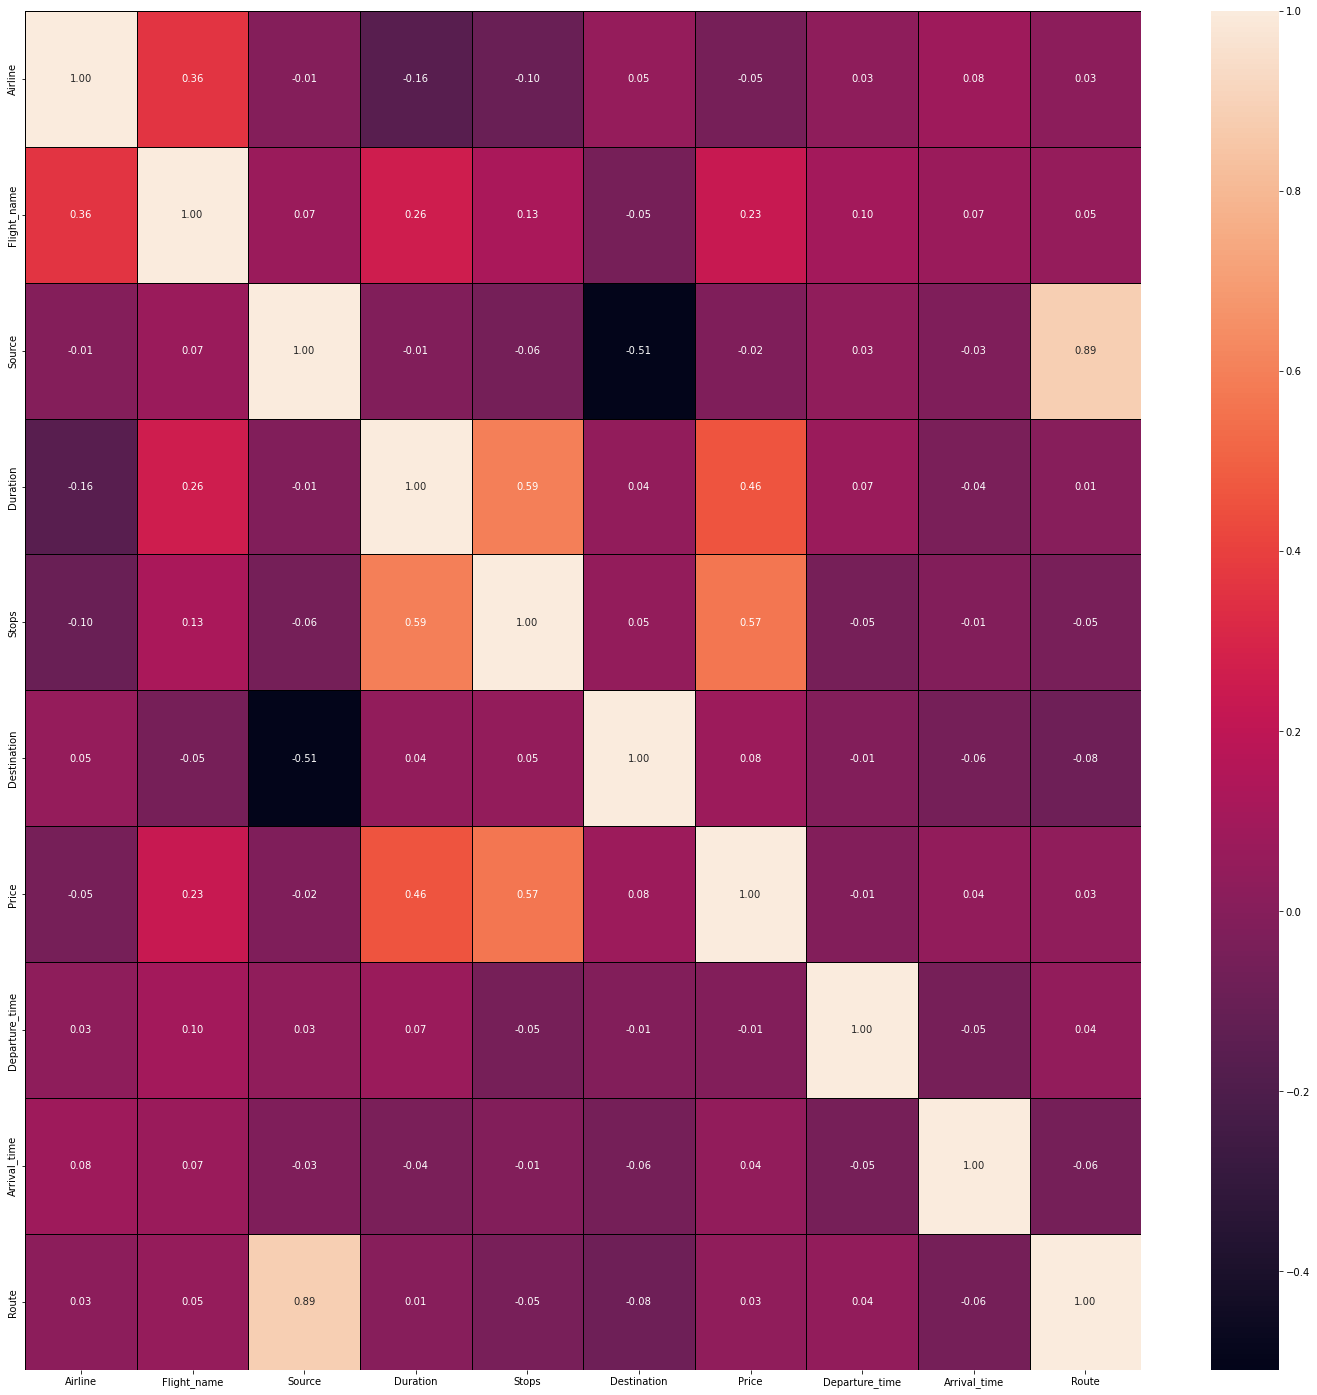

In [139]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem does not exist in this database

In [140]:
x = df.drop('Price',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by="VIF", ascending=False)

,Features,VIF
8,Route,96.576264
2,Source,68.075878
5,Destination,19.883620
1,Flight_name,6.825137
4,Stops,5.707367
3,Duration,5.168280
6,Departure_time,5.113137
7,Arrival_time,4.410732
0,Airline,3.546878


In [141]:
df

,Airline,Flight_name,Source,Duration,Stops,Destination,Price,Departure_time,Arrival_time,Route
0,4.0,381.0,0.0,2.00,0,4.0,5950,13.20,15.20,3.0
1,4.0,403.0,0.0,2.05,0,4.0,5950,5.30,7.35,3.0
2,4.0,386.0,0.0,2.05,0,4.0,5950,15.15,17.20,3.0
3,4.0,383.0,0.0,2.15,0,4.0,5950,20.50,23.05,3.0
4,4.0,392.0,0.0,2.15,0,4.0,5950,22.45,1.00,3.0
...,...,...,...,...,...,...,...,...,...,...
14533,0.0,287.0,2.0,13.00,2,0.0,19488,11.05,0.05,7.0
14534,0.0,286.0,2.0,14.15,2,0.0,19488,6.00,20.15,7.0
14535,0.0,292.0,2.0,14.30,2,0.0,24527,5.45,20.15,7.0
14536,0.0,295.0,2.0,14.20,2,0.0,27468,18.35,8.55,7.0


In [142]:
x = df.drop('Price',axis=1)
y = df['Price']

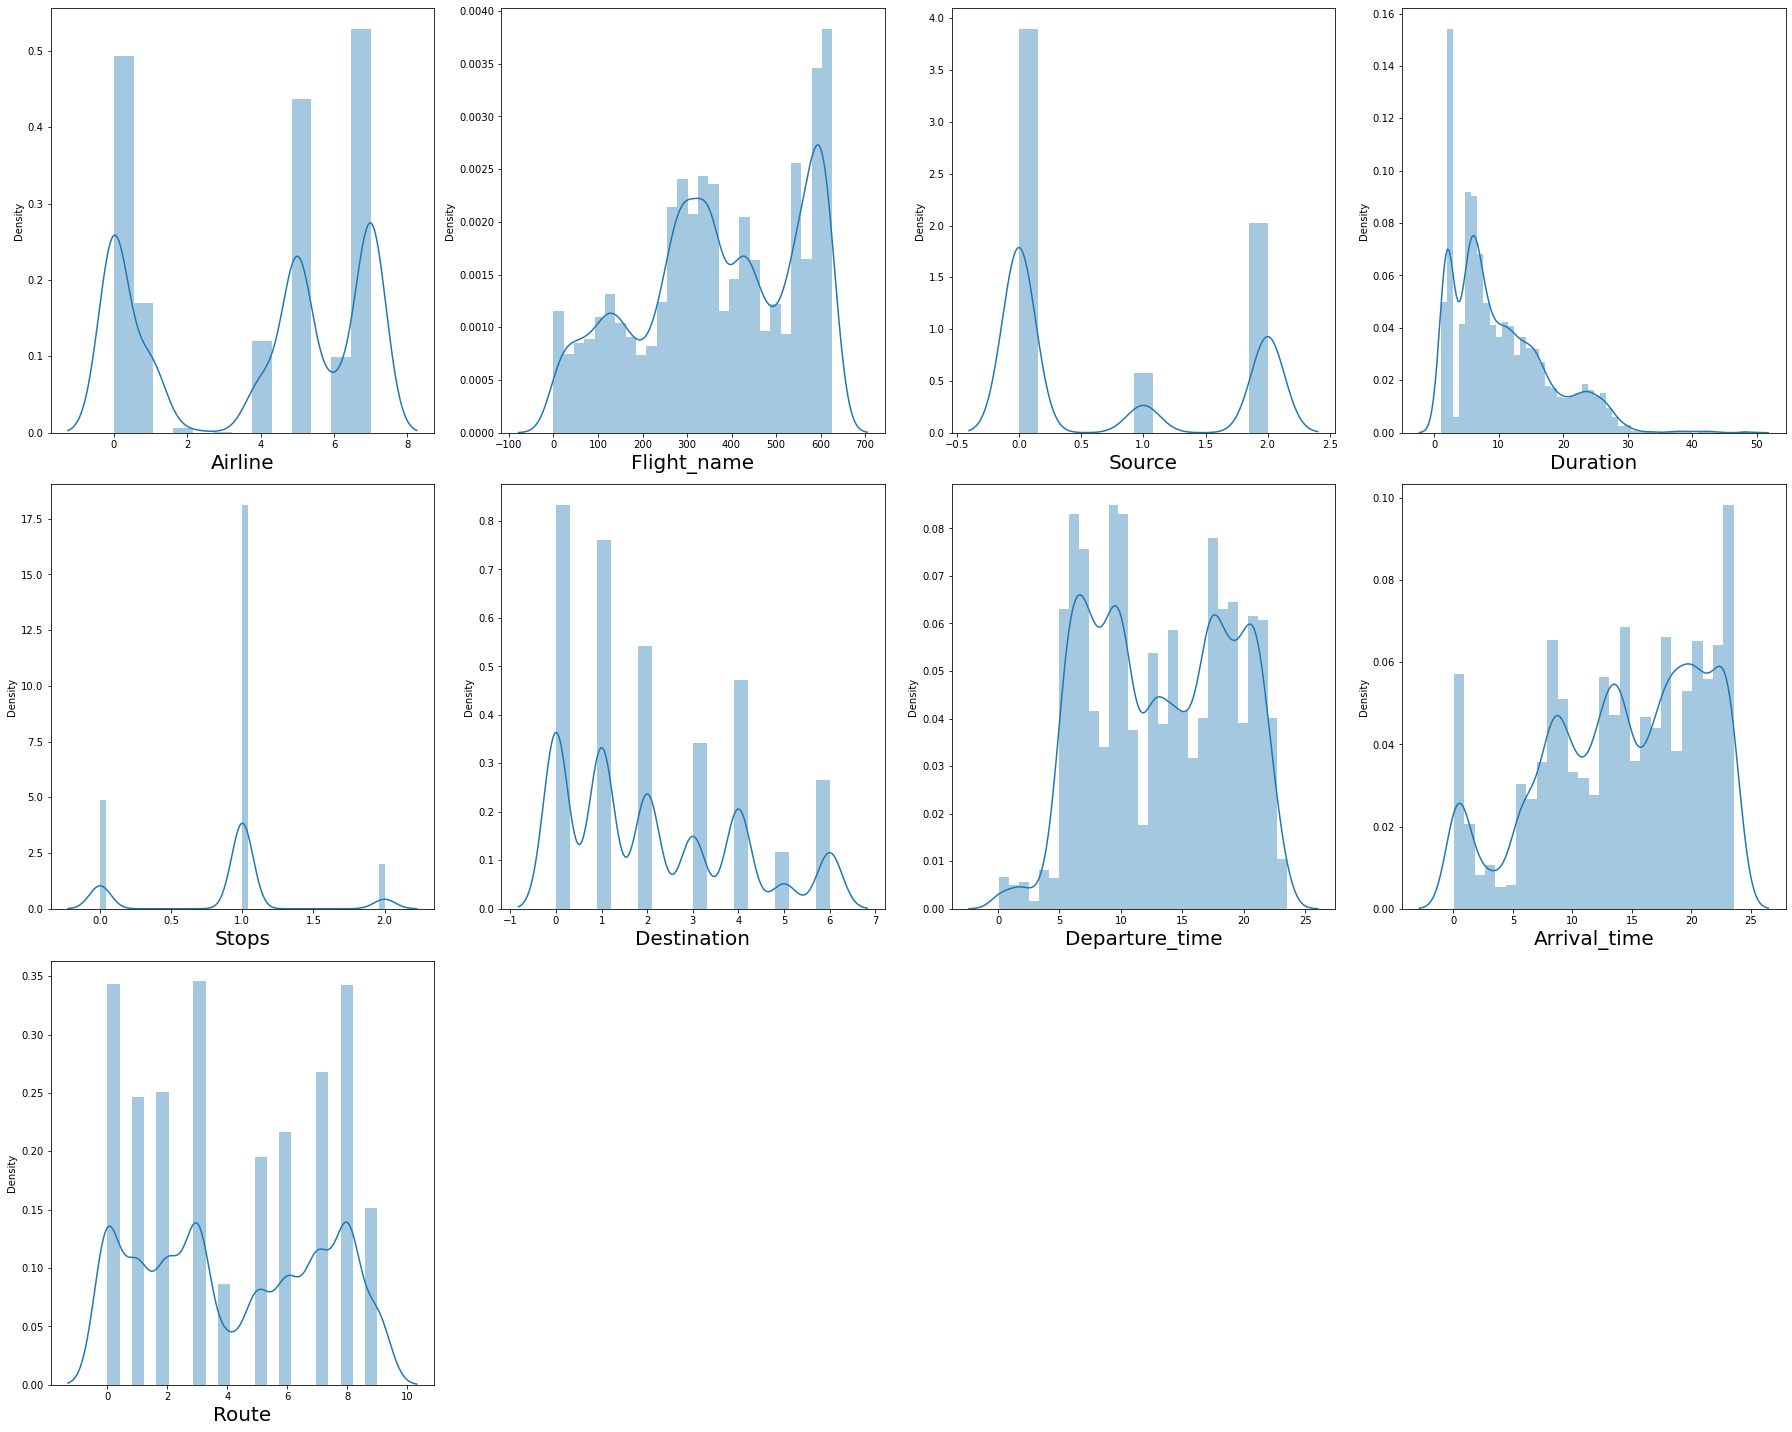

In [143]:
plt.figure(figsize=(25,20), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [144]:
for i in df.columns:
    a = df[i].skew()
    print(i,'=',a)

Airline = -0.3291894466319817
Flight_name = -0.2694041197156538
Source = 0.6004733845040787
Duration = 1.0170082434550012
Stops = -0.17173233209736546
Destination = 0.6472768617099439
Price = 1.1043449015403224
Departure_time = -0.02203781829781059
Arrival_time = -0.4556364061841863
Route = 0.048394438653599894


Not considering skewness of categorical data columns
- Duration column has skewness

In [145]:
df.describe()

,Airline,Flight_name,Source,Duration,Stops,Destination,Price,Departure_time,Arrival_time,Route
count,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000,14538.000000
mean,3.852112,368.701954,0.711377,10.275052,0.885816,2.081235,11202.612464,13.275162,14.226207,4.243981
std,2.842741,177.608480,0.910108,7.415278,0.511709,1.865924,4444.533262,5.592099,6.577252,2.975116
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2454.000000,0.100000,0.050000,0.000000
25%,0.000000,255.000000,0.000000,5.100000,1.000000,0.250000,7754.000000,8.300000,9.200000,2.000000
50%,5.000000,360.000000,0.000000,8.250000,1.000000,2.000000,10680.000000,13.150000,14.450000,4.000000
75%,7.000000,542.000000,2.000000,14.550000,1.000000,4.000000,13620.000000,18.300000,20.000000,7.000000
max,7.000000,626.000000,2.000000,48.500000,2.000000,6.000000,51834.000000,23.550000,23.550000,9.000000


Database is ready to remove outliers if exist 

In [146]:
x = df.drop(['Price'],axis=1)
y = df['Price']

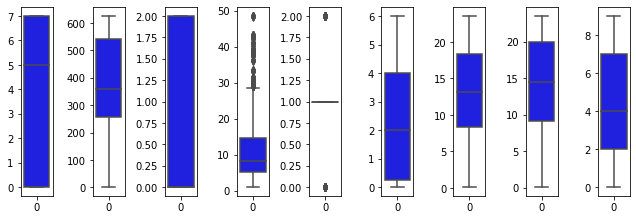

In [147]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Duration Column has outliers.

In [148]:
df.columns

Index(['Airline', 'Flight_name', 'Source', 'Duration', 'Stops', 'Destination',
       'Price', 'Departure_time', 'Arrival_time', 'Route'],
      dtype='object')

In [149]:
old_data = (df.shape)[0]

In [150]:
q1 = df['Duration'].quantile(0.25)
q3 = df['Duration'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Duration'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Duration'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Duration column

In [151]:
new_data = (df.shape)[0]

In [152]:
data_loss = old_data - new_data
print('Data Loss -',data_loss)

Data Loss - 165


Data Loss is very less

In [153]:
x = df.drop(['Price'],axis=1)
y = df['Price']

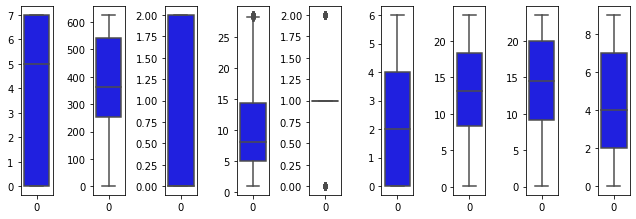

In [154]:
a = x.columns.values
col = 35
row = 30
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Cleared all the outliers

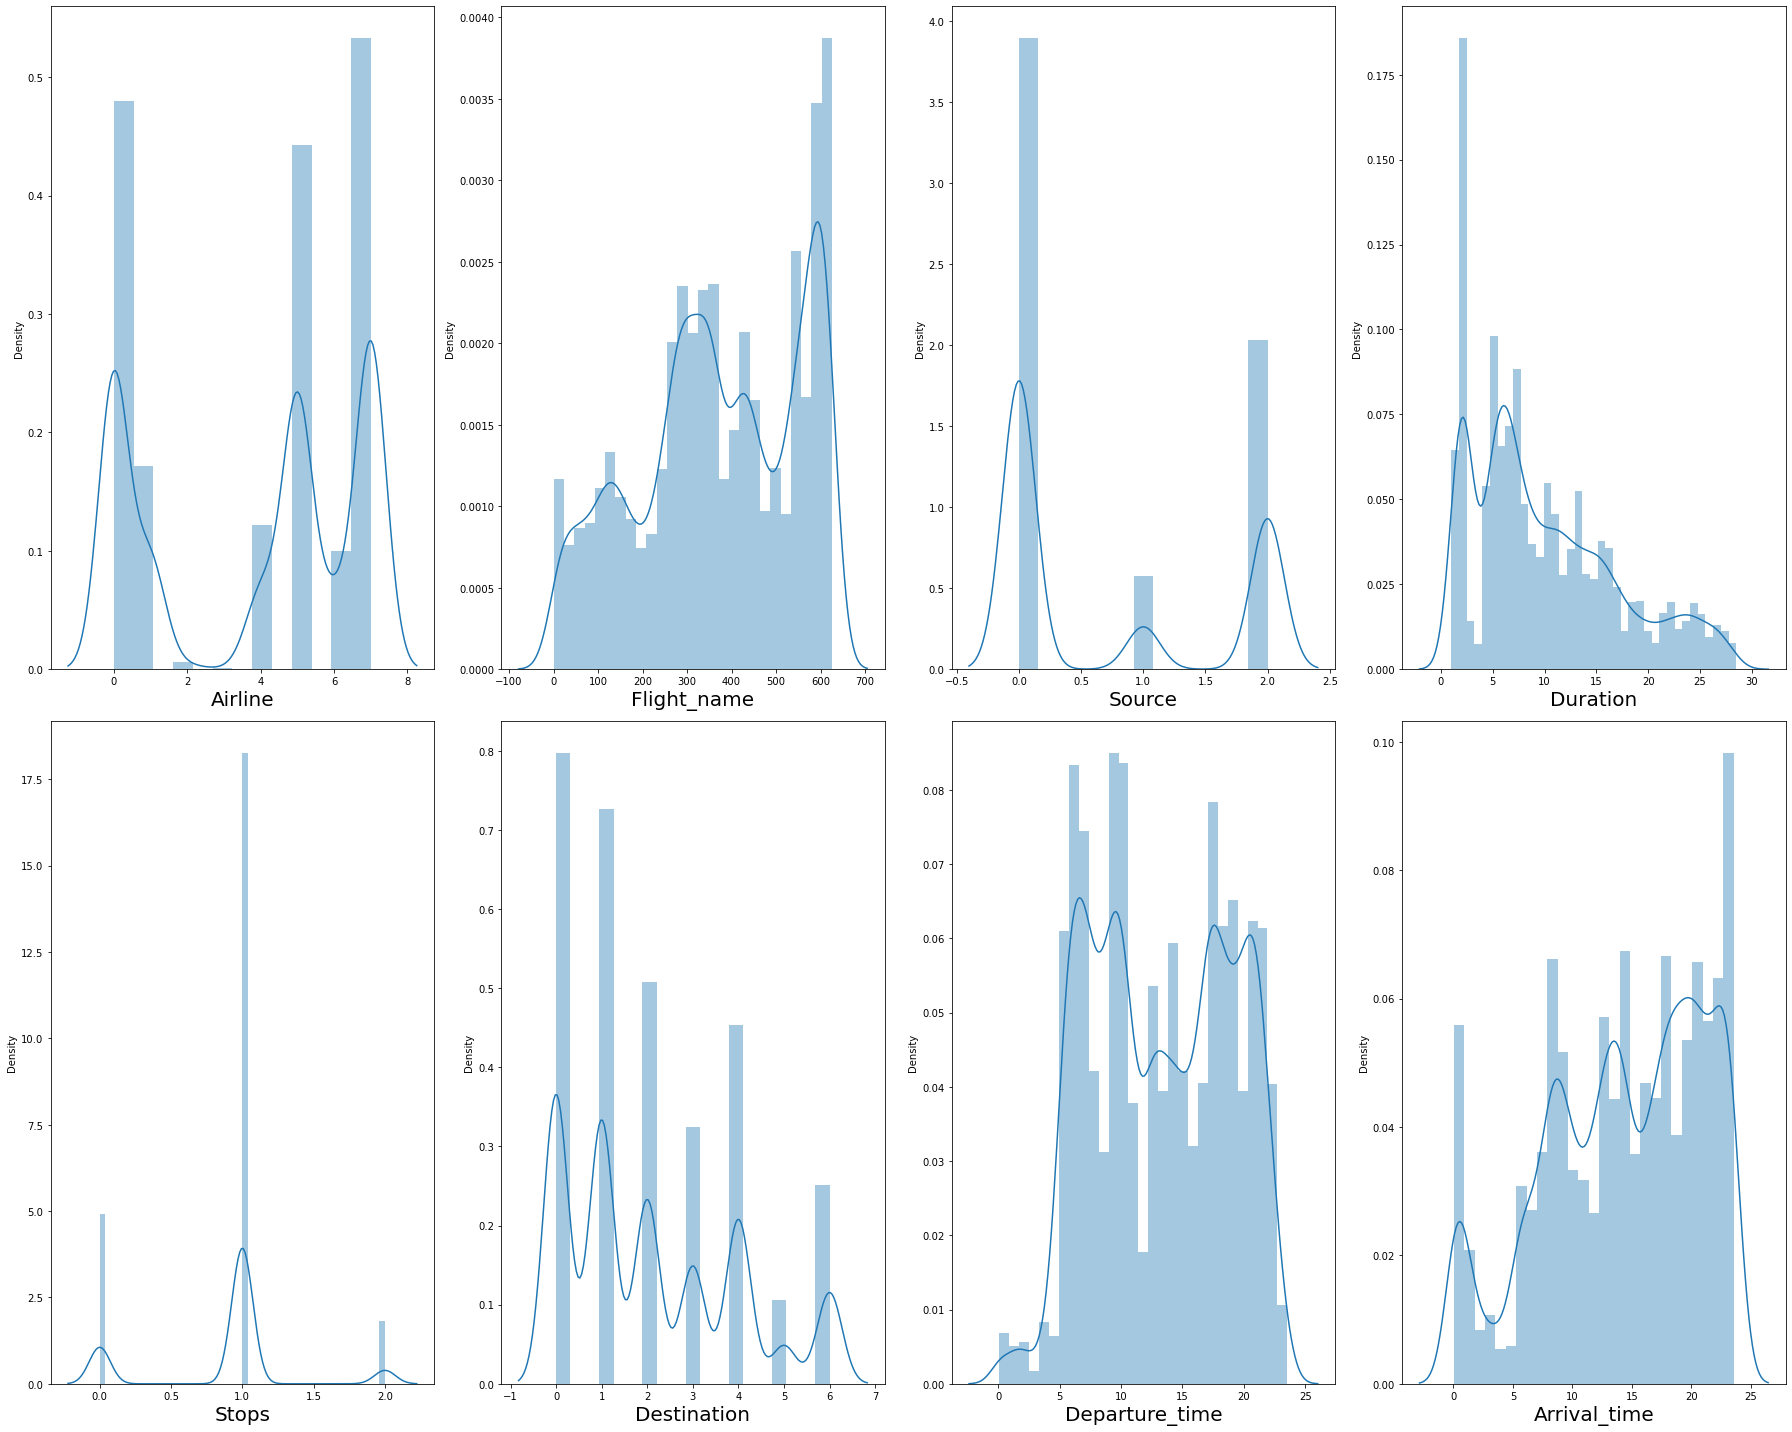

In [155]:
plt.figure(figsize=(25,20), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Duration column has skewness in the data

In [156]:
for i in df.columns:
    a = df[i].skew()
    print(i,'=',a)

Airline = -0.3518326502588468
Flight_name = -0.2780328518366566
Source = 0.5957162879272326
Duration = 0.7845465114745579
Stops = -0.21825038885415243
Destination = 0.6514239745867424
Price = 1.0565781210794525
Departure_time = -0.032312053650162924
Arrival_time = -0.45397017219883756
Route = 0.045348487904098


In [157]:
scaler = PowerTransformer(method='yeo-johnson')
df[['Duration']] = scaler.fit_transform(df[['Duration']].values)

Removed skewness from Duration column

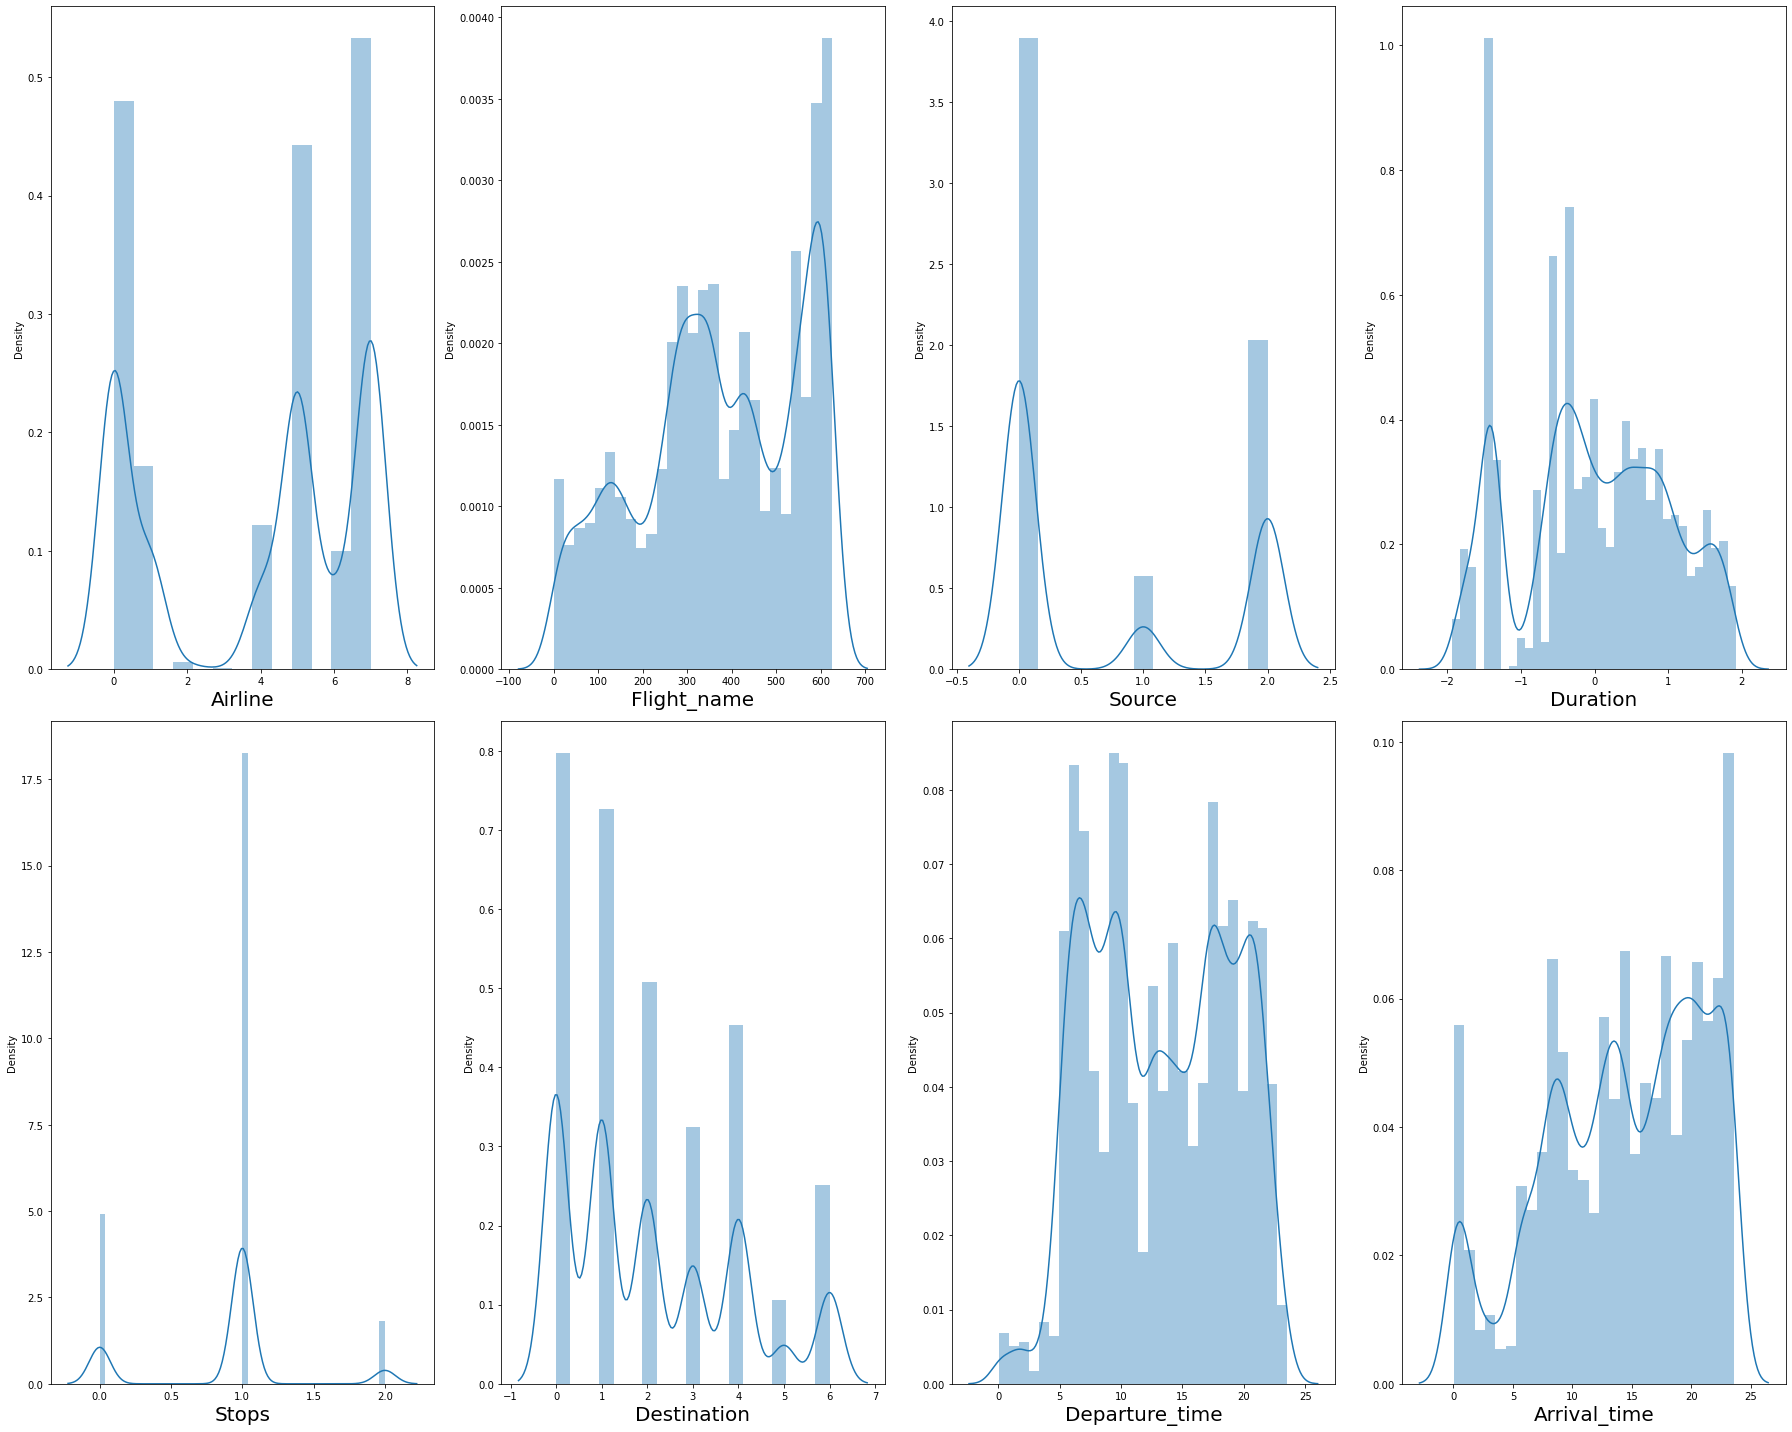

In [158]:
x = df.drop(['Price'],axis=1)
y = df['Price']

plt.figure(figsize=(25,20), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [159]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [160]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# LinearRegression

In [161]:
reg = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.3905781652385685
At Random state 0 the testing accuracy is :- 0.39668225938326607


At Random state 1 the training accuracy is :- 0.3880326566879372
At Random state 1 the testing accuracy is :- 0.4052188874500242


At Random state 2 the training accuracy is :- 0.39341256132498337
At Random state 2 the testing accuracy is :- 0.38859538716359465


At Random state 3 the training accuracy is :- 0.40118591929446745
At Random state 3 the testing accuracy is :- 0.3663013029357707


At Random state 4 the training accuracy is :- 0.38910381059701693
At Random state 4 the testing accuracy is :- 0.4012082603792624


At Random state 5 the training accuracy is :- 0.3936079546358763
At Random state 5 the testing accuracy is :- 0.38843713595649776


At Random state 6 the training accuracy is :- 0.3872382553774507
At Random state 6 the testing accuracy is :- 0.4070137779910533


At Random state 7 the training accuracy is :- 0.3937486874476446
At Random st

In [162]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 87)

In [163]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {r2_score (y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {r2_score (y_test,pred)*100:.2f}%') 
        
        print ('\n mean_absolute_error',mean_absolute_error(y_test,pred))
        print ('\n mean_squared_error',mean_squared_error (y_test,pred))
         

In [164]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print_score(reg,x_train,x_test,y_train,y_test, train=True)
print_score(reg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 39.20%

===============Test Result===============
Accuracy Score: 39.25%

 mean_absolute_error 2479.1668456139205

 mean_squared_error 11495862.94899482


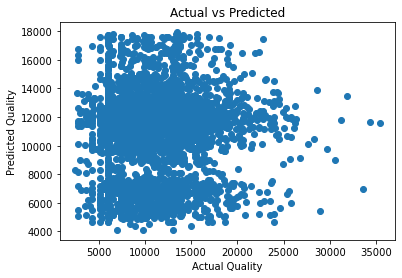

In [165]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

#### Regularization

In [166]:
Lassocv = LassoCV(alphas = np.arange(0.001,0.1,0.01), max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
prediction = lasso_reg.predict(x_test)
r2_score(y_test, prediction)

0.39248471989326505

In [167]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
rdgcv.fit(x_train, y_train)
alpha = rdgcv.alpha_
rd_model = Ridge(alpha)
rd_model.fit(x_train, y_train)
prediction = rd_model.predict(x_test)
r2_score(y_test, prediction)

0.3924846835853567

# Support Vector Regression

In [168]:
svr = SVR()
svr.fit(x_train,y_train)

print_score(svr,x_train,x_test,y_train,y_test, train=True)
print_score(svr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 6.34%

===============Test Result===============
Accuracy Score: 5.98%

 mean_absolute_error 3215.9750948061233

 mean_squared_error 17792095.21346397


# DecisionTreeRegressor

In [169]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test, train=True)
print_score(dtr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 78.16%

===============Test Result===============
Accuracy Score: 66.86%

 mean_absolute_error 1538.2863425475778

 mean_squared_error 6271041.546811653


# AdaBoostRegressor

In [170]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test, train=True)
print_score(ada,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 5.04%

===============Test Result===============
Accuracy Score: 3.37%

 mean_absolute_error 3531.94315329319

 mean_squared_error 18285520.6158023


# GradientBoostingRegressor

In [175]:
gbdt = GradientBoostingRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    gbdt.fit(x_train, y_train)
    x_pred = gbdt.predict(x_train)
    y_pred = gbdt.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.5946961507046226
At Random state 0 the testing accuracy is :- 0.593359435384704


At Random state 1 the training accuracy is :- 0.5981079886601248
At Random state 1 the testing accuracy is :- 0.6021821404478402


At Random state 2 the training accuracy is :- 0.605165168234278
At Random state 2 the testing accuracy is :- 0.5742224251990624


At Random state 3 the training accuracy is :- 0.6044423026785516
At Random state 3 the testing accuracy is :- 0.5552980809103036


At Random state 4 the training accuracy is :- 0.5991484412826926
At Random state 4 the testing accuracy is :- 0.5880505611522413


At Random state 5 the training accuracy is :- 0.6038296530782217
At Random state 5 the testing accuracy is :- 0.5786445320757054


At Random state 6 the training accuracy is :- 0.5992105759033874
At Random state 6 the testing accuracy is :- 0.6013558767227211


At Random state 7 the training accuracy is :- 0.6080785923326817
At Random state 7 th

In [176]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 86)

In [177]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 60.24%

===============Test Result===============
Accuracy Score: 60.02%

 mean_absolute_error 1825.929170103027

 mean_squared_error 7384024.657354226


# RandomForestRegressor

In [172]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

print_score(rfr,x_train,x_test,y_train,y_test, train=True)
print_score(rfr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 77.89%

===============Test Result===============
Accuracy Score: 67.66%

 mean_absolute_error 1531.4351315788306

 mean_squared_error 6120388.789240056


# KNeighborsRegressor

In [173]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

print_score(knr,x_train,x_test,y_train,y_test, train=True)
print_score(knr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 74.67%

===============Test Result===============
Accuracy Score: 65.39%

 mean_absolute_error 1590.0208124652197

 mean_squared_error 6549153.3534335


# Findings

- LinearRegression train accuracy score 39.20% and test accuracy score 39.25%
- Support Vector Regression train accuracy score 6.34% and test accuracy score 5.98%
- DecisionTreeRegressor train accuracy score 78.16% and test accuracy score 66.86%
- AdaBoostRegressor train accuracy score 5.04% and test accuracy score 3.37%
- GradientBoostingRegressor train accuracy score 60.24% and test accuracy score 60.02%
- RandomForestRegressor train accuracy score 77.89% and test accuracy score 67.66%
- KNeighborsRegressor train accuracy score 74.67% and test accuracy score 65.39%





# Conclusion 

##### Selecting GradientBoostingRegressor since the Accuracy score and test scores are greater and close to each other.

### Saving the Model 

In [178]:
file = 'Flight_Ticket_Price.pickle'
pickle.dump(gbdt, open(file, 'wb'))